In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    roc_curve, auc
)


In [9]:
# Cargar el dataset
df_hd = pd.read_csv('heart_cleveland_upload.csv')  # Ajusta el nombre si es distinto
df_hd.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [13]:
# Revisa las columnas para identificar categóricas y faltantes
df_hd.info()
df_hd.describe()

# Aplicar One Hot Encoding si hay variables categóricas
df_hd = pd.get_dummies(df_hd, drop_first=True)

# Eliminar o imputar valores faltantes
df_hd.dropna(inplace=True)

# Separar X e y
X = df_hd.drop('condition', axis=1)
y = df_hd['condition']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [15]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

# Predicciones
y_pred = modelo_log.predict(X_test)
y_proba = modelo_log.predict_proba(X_test)[:, 1]  # Para curva ROC


In [17]:
# Reporte de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[37 11]
 [ 9 33]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        48
           1       0.75      0.79      0.77        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



Reporte de clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        48
           1       0.70      0.76      0.73        42

    accuracy                           0.73        90
   macro avg       0.73      0.74      0.73        90
weighted avg       0.74      0.73      0.73        90


Matriz de confusión:
[[34 14]
 [10 32]]


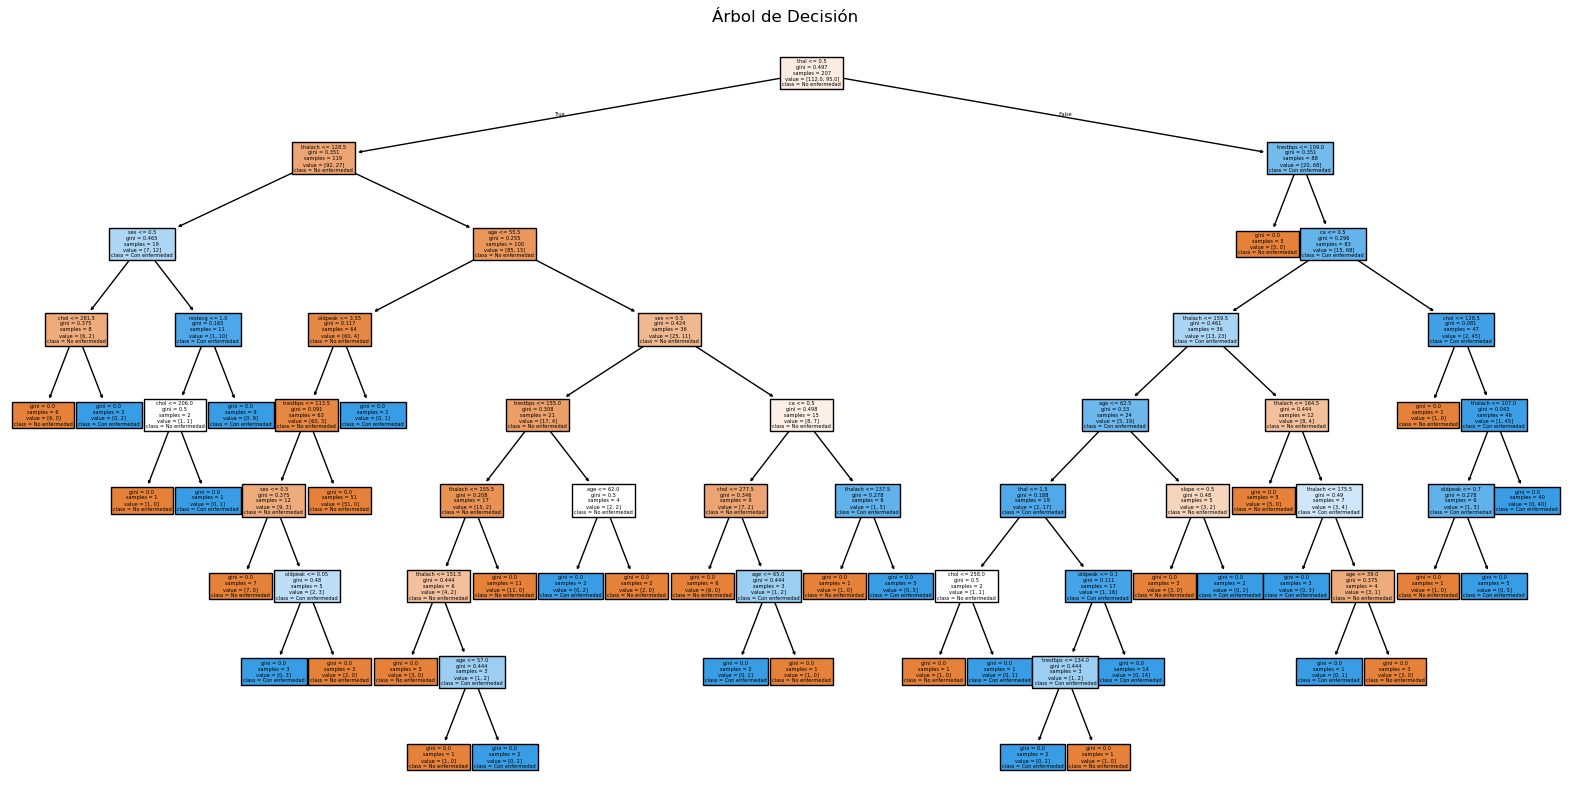

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree_model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación - Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_tree))

# Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=["No enfermedad", "Con enfermedad"], filled=True)
plt.title("Árbol de Decisión")
plt.show()